# CO2 EMISSION PREDICTION for VEHICLES VIA ARTIFICIAL NEURAL NETWORK

# Import libraries

In [165]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset 

In [166]:
df=pd.read_csv("car_carbon_emission.csv")
df.head(10)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301
5,2001,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,8.5,10.1,28,232
6,2001,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,10.6,8.3,9.6,29,221
7,2001,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.5,9.7,29,223
8,2001,ACURA,MDX,SUV,3.5,6,A5,Z,15.5,11.1,13.5,21,311
9,2001,ACURA,NSX,TWO-SEATER,3.0,6,AS4,Z,15.3,10.9,13.3,21,306


# Data Wrangling

In [167]:
df.drop(df.columns[[9, 10, 11]], axis=1, inplace=True)
df.head(10)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
5,2001,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,232
6,2001,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,10.6,221
7,2001,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,223
8,2001,ACURA,MDX,SUV,3.5,6,A5,Z,15.5,311
9,2001,ACURA,NSX,TWO-SEATER,3.0,6,AS4,Z,15.3,306


In [168]:
df.isnull().sum()

MODEL                0
MAKE                 0
MODEL.1              0
VEHICLE CLASS        0
ENGINE_SIZE          0
CYLINDERS            0
TRANSMISSION         0
FUEL                 0
FUEL_CONSUMPTION*    0
CO2_EMISSIONS        0
dtype: int64

In [169]:
df.dtypes

MODEL                  int64
MAKE                  object
MODEL.1               object
VEHICLE CLASS         object
ENGINE_SIZE          float64
CYLINDERS              int64
TRANSMISSION          object
FUEL                  object
FUEL_CONSUMPTION*    float64
CO2_EMISSIONS          int64
dtype: object

In [170]:
df.describe()

,MODEL,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION*,CO2_EMISSIONS
count,679.0,679.000000,679.000000,679.000000,679.000000
mean,2001.0,3.252577,5.798233,14.591900,293.656848
std,0.0,1.203751,1.531073,3.025654,60.372456
min,2001.0,1.000000,3.000000,4.900000,104.000000
25%,2001.0,2.200000,4.000000,12.700000,253.000000
50%,2001.0,3.000000,6.000000,14.300000,283.000000
75%,2001.0,4.200000,6.000000,16.650000,340.000000
max,2001.0,8.000000,12.000000,23.200000,478.000000


In [171]:
df["VEHICLE CLASS"].value_counts()

COMPACT                     145
PICKUP TRUCK - STANDARD     101
SUV                          98
MID-SIZE                     82
SUBCOMPACT                   62
TWO-SEATER                   31
STATION WAGON - MID-SIZE     31
FULL-SIZE                    30
VAN - CARGO                  23
VAN - PASSENGER              18
MINICOMPACT                  17
MINIVAN                      17
STATION WAGON - SMALL        12
PICKUP TRUCK - SMALL         12
Name: VEHICLE CLASS, dtype: int64

In [172]:
df["TRANSMISSION"].value_counts()

A4     312
M5     198
A5     106
M6      26
AS5     15
AS4     14
A3       7
AV       1
Name: TRANSMISSION, dtype: int64

In [173]:
df["FUEL"].value_counts()

X    442
Z    223
D      6
E      4
N      4
Name: FUEL, dtype: int64

# Exploratory Data Analysis with Visualization

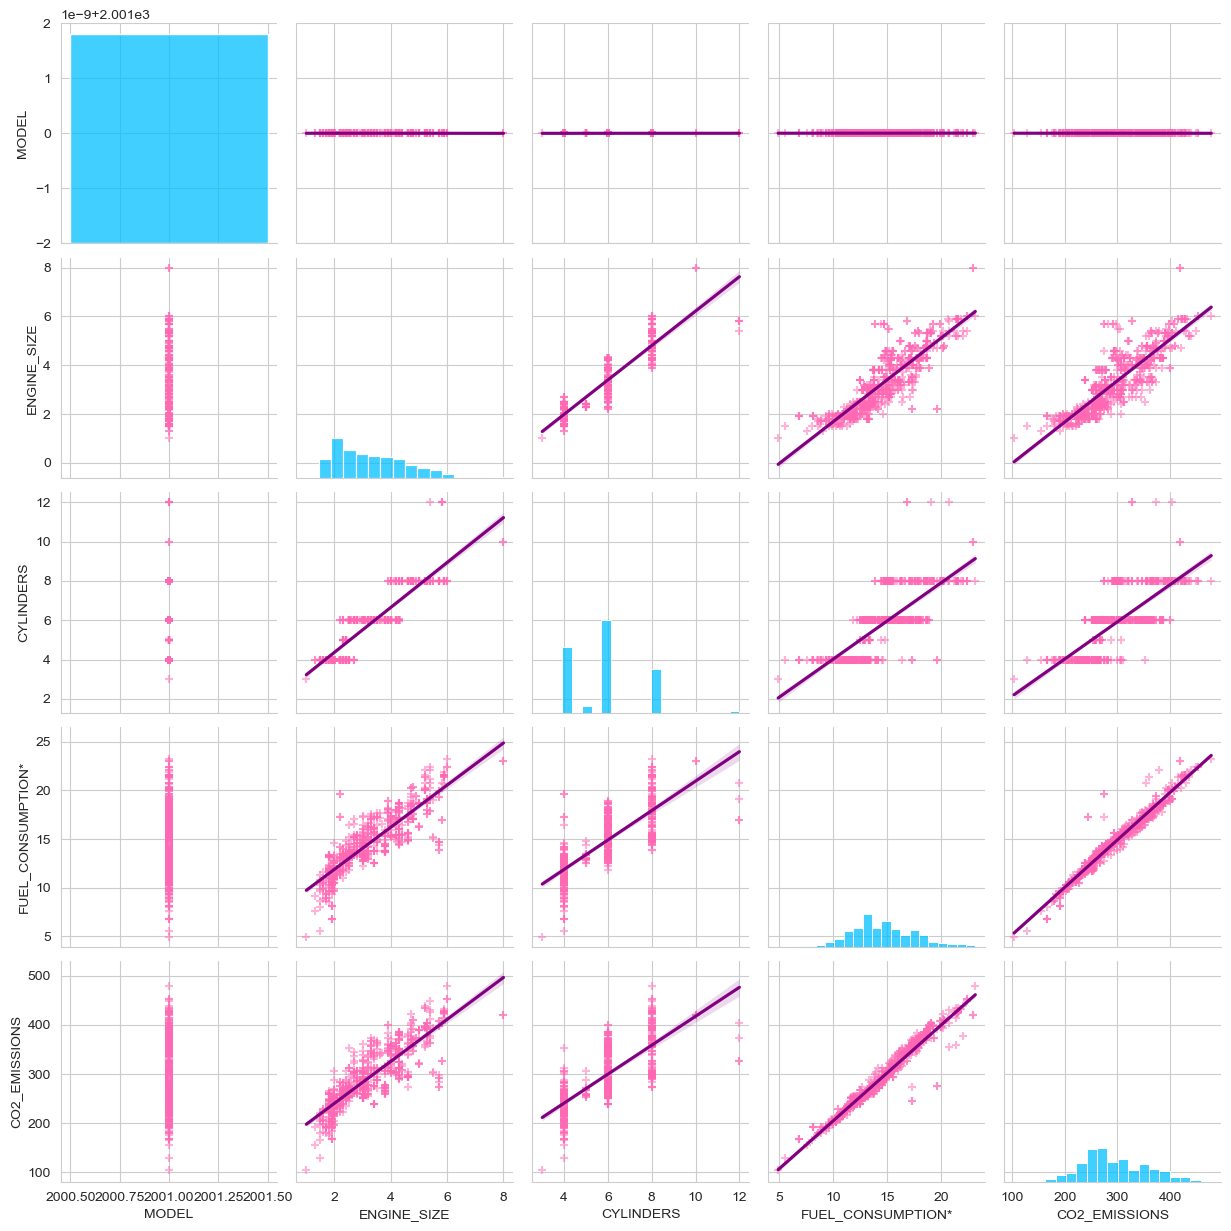

In [174]:
sns.set_style("whitegrid")

sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'purple'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': 'hotpink'}},
               
                 diag_kws= {'color': 'deepskyblue'})

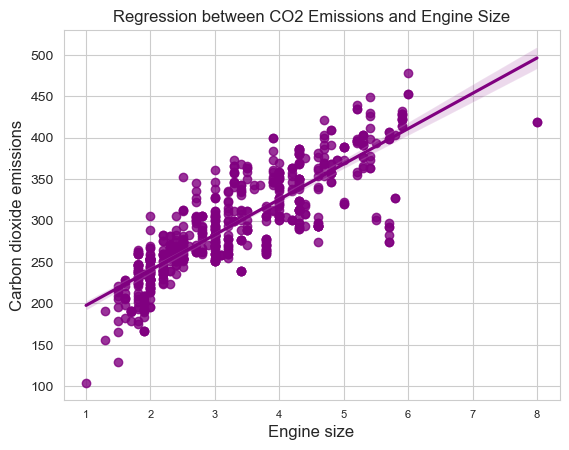

In [175]:
sns.set_style("whitegrid")
sns.regplot(df, x="ENGINE_SIZE", y="CO2_EMISSIONS", color="purple")
plt.xlabel("Engine size", fontsize=12, loc="center")
plt.ylabel("Carbon dioxide emissions", fontsize=12, loc="center")
plt.title('Regression between CO2 Emissions and Engine Size')
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()

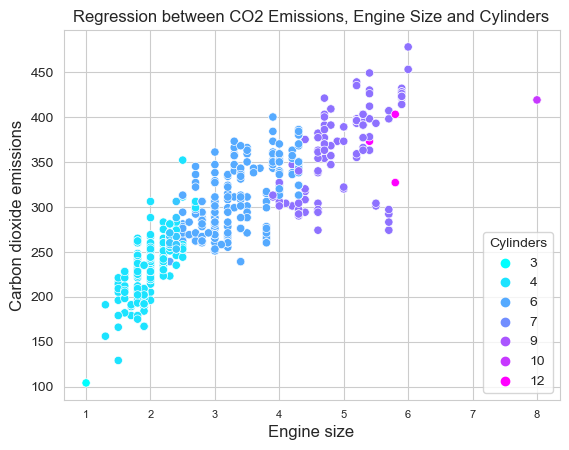

In [176]:
sns.set_style("whitegrid")
sns.scatterplot(df, x="ENGINE_SIZE", y="CO2_EMISSIONS", hue="CYLINDERS", palette="cool", sizes=(4,8))
plt.xlabel("Engine size", fontsize=12, loc="center")
plt.ylabel("Carbon dioxide emissions", fontsize=12, loc="center")
plt.title('Regression between CO2 Emissions, Engine Size and Cylinders')
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.legend(title='Cylinders', loc='lower right')
plt.show()

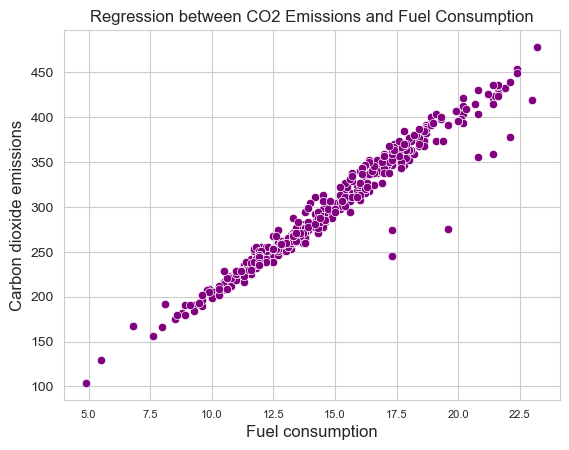

In [177]:
sns.set_style("whitegrid")
sns.scatterplot(df, x="FUEL_CONSUMPTION*", y="CO2_EMISSIONS", color="purple")
plt.xlabel("Fuel consumption", fontsize=12, loc="center")
plt.ylabel("Carbon dioxide emissions", fontsize=12, loc="center")
plt.title('Regression between CO2 Emissions and Fuel Consumption')
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()

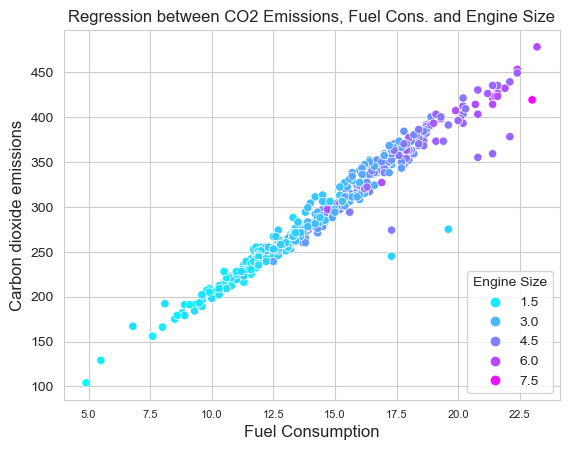

In [178]:
sns.set_style("whitegrid")
sns.scatterplot(df, x="FUEL_CONSUMPTION*", y="CO2_EMISSIONS", hue="ENGINE_SIZE", palette="cool", sizes=(4,8))
plt.xlabel("Fuel Consumption", fontsize=12, loc="center")
plt.ylabel("Carbon dioxide emissions", fontsize=12, loc="center")
plt.title('Regression between CO2 Emissions, Fuel Cons. and Engine Size')
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.legend(title='Engine Size', loc='lower right')
plt.show()

# Feature Engineering

In [179]:
features=df[["VEHICLE CLASS", "ENGINE_SIZE", "CYLINDERS", "TRANSMISSION", "FUEL", "FUEL_CONSUMPTION*"]]
features.head(10)

,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*
0,COMPACT,1.7,4,A4,X,9.3
1,COMPACT,1.7,4,M5,X,8.9
2,COMPACT,3.2,6,AS5,Z,13.7
3,MID-SIZE,3.2,6,AS5,Z,13.8
4,MID-SIZE,3.5,6,A4,Z,15.0
5,SUBCOMPACT,1.8,4,A4,X,11.4
6,SUBCOMPACT,1.8,4,M5,X,10.6
7,SUBCOMPACT,1.8,4,M5,Z,10.8
8,SUV,3.5,6,A5,Z,15.5
9,TWO-SEATER,3.0,6,AS4,Z,15.3


In [180]:
features_one_hot = features

features_one_hot = pd.concat([features_one_hot, pd.get_dummies(features['VEHICLE CLASS'])],axis=1)
features_one_hot.drop(['VEHICLE CLASS'], axis = 1, inplace = True)

features_one_hot = pd.concat([features_one_hot, pd.get_dummies(features['TRANSMISSION'])],axis=1)
features_one_hot.drop(['TRANSMISSION'], axis = 1, inplace = True)

features_one_hot = pd.concat([features_one_hot, pd.get_dummies(features['FUEL'])],axis=1)
features_one_hot.drop(['FUEL'], axis = 1, inplace = True)

features_one_hot.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION*,COMPACT,FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,...,AS4,AS5,AV,M5,M6,D,E,N,X,Z
0,1.7,4,9.3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.7,4,8.9,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3.2,6,13.7,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.2,6,13.8,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,3.5,6,15.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [181]:
features_one_hot.corr()

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION*,COMPACT,FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,...,AS4,AS5,AV,M5,M6,D,E,N,X,Z
ENGINE_SIZE,1.000000,0.897588,0.861589,-0.392348,0.130020,-0.062791,-0.009355,0.029044,-0.039316,0.325464,...,-0.028744,-0.049054,-0.055956,-0.293930,0.072308,-0.106173,-0.067362,0.118230,0.044336,-0.032131
CYLINDERS,0.897588,1.000000,0.765717,-0.314154,0.196987,0.007518,0.033456,0.021133,-0.099205,0.217440,...,-0.007961,-0.019474,-0.045139,-0.324155,0.076478,-0.110978,-0.090479,0.110783,-0.153114,0.174212
FUEL_CONSUMPTION*,0.861589,0.765717,1.000000,-0.428650,0.012428,-0.088251,0.027242,0.016954,0.066166,0.394820,...,-0.022578,0.003717,-0.115489,-0.267613,0.070340,-0.223040,0.098232,0.147881,0.029820,-0.025924
COMPACT,-0.392348,-0.314154,-0.428650,1.000000,-0.112034,-0.193123,-0.083504,-0.083504,-0.069894,-0.217826,...,-0.025029,-0.004969,0.073701,0.124276,-0.029070,0.104398,-0.040114,-0.040114,-0.048167,0.041157
FULL-SIZE,0.130020,0.196987,0.012428,-0.112034,1.000000,-0.079682,-0.034454,-0.034454,-0.028838,-0.089874,...,0.170535,-0.032315,-0.008257,-0.137943,-0.042901,-0.020300,-0.016551,0.077099,-0.038019,0.032767
MID-SIZE,-0.062791,0.007518,-0.088251,-0.193123,-0.079682,1.000000,-0.059390,-0.059390,-0.049710,-0.154923,...,0.009837,0.005797,-0.014233,-0.088619,-0.050400,-0.034994,-0.028530,-0.028530,-0.155297,0.173892
MINICOMPACT,-0.009355,0.033456,0.027242,-0.083504,-0.034454,-0.059390,1.000000,-0.025680,-0.021494,-0.066987,...,-0.023251,0.168316,-0.006154,-0.040594,0.213632,-0.015131,-0.012336,-0.012336,-0.218843,0.229153
MINIVAN,0.029044,0.021133,0.016954,-0.083504,-0.034454,-0.059390,-0.025680,1.000000,-0.021494,-0.066987,...,0.109418,-0.024086,-0.006154,-0.102815,-0.031976,-0.015131,-0.012336,-0.012336,0.117343,-0.112064
PICKUP TRUCK - SMALL,-0.039316,-0.099205,0.066166,-0.069894,-0.028838,-0.049710,-0.021494,-0.021494,1.000000,-0.056069,...,-0.019462,-0.020160,-0.005151,0.061501,-0.026764,-0.012665,0.573919,-0.010325,0.004420,-0.093799
PICKUP TRUCK - STANDARD,0.325464,0.217440,0.394820,-0.217826,-0.089874,-0.154923,-0.066987,-0.066987,-0.056069,1.000000,...,-0.060653,-0.062829,-0.016054,0.105158,-0.083412,-0.039470,-0.032179,-0.032179,0.271366,-0.257075


In [182]:
X = features_one_hot.astype(float)
X = np.array(X).astype('float32')

In [183]:
Y = df['CO2_EMISSIONS'].to_numpy().astype('float32')
Y = Y.reshape(-1,1)   # we reshape it to make it 1 by 1 dimension
type(Y)

numpy.ndarray

In [184]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
Y = transform.fit_transform(Y)

In [185]:
#Train and Test split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=5)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)

X_train:  (543, 30)
X_test:  (136, 30)
Y_train:  (543, 1)
Y_test:  (136, 1)


# Building and Training the Neural Network Model

In [186]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 30))  # input layer of neural network with 50 neurons, and their dimensions equal to 9 because it has to be same with the column number in the training input data
ANN_model.add(Activation('relu')) # we defined the activation function of first layer
ANN_model.add(Dense(150)) # we added an hidden layer with 150 neurons
ANN_model.add(Activation('relu'))  # we defined the activation function of the first hidden layer
ANN_model.add(Dropout(0.5))  # After training, some of the layers starts to develop co-dependency, so we need to drop randomly the half of the neurons in the layer together with their weights to improve the performance of generalization of network
ANN_model.add(Dense(150))  # we added second hidden layer with 150 neurons
ANN_model.add(Activation('relu'))  # we defined the activation function of the second hidden layer
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))   # we added third hidden layer with 50 neurons
ANN_model.add(Activation('linear'))  # we defined the activation function for third layer 
ANN_model.add(Dense(1))   # we added output layer with 1 neuron
ANN_model.compile(loss = 'mse', optimizer = 'adam')  # the loss metric defined as mse, and optimizer defined as adam optimizer
ANN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 50)                1550      
                                                                 
 activation_20 (Activation)  (None, 50)                0         
                                                                 
 dense_26 (Dense)            (None, 150)               7650      
                                                                 
 activation_21 (Activation)  (None, 150)               0         
                                                                 
 dropout_10 (Dropout)        (None, 150)               0         
                                                                 
 dense_27 (Dense)            (None, 150)               22650     
                                                                 
 activation_22 (Activation)  (None, 150)              

In [187]:
epochs_hist=ANN_model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.2) # We defined it as an object to see how the neural network is progressing

Epoch 1/100
44/44 [==============================] - 1s 9ms/step - loss: 0.7660 - val_loss: 0.2087
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 0.4816 - val_loss: 0.1603
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2793 - val_loss: 0.1511
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2820 - val_loss: 0.1160
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2381 - val_loss: 0.1330
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2017 - val_loss: 0.1115
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1573 - val_loss: 0.1303
Epoch 8/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1778 - val_loss: 0.0994
Epoch 9/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1542 - val_loss: 0.1056
Epoch 10/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1560 - val_loss: 0.0799
Epoch 11/

# CO2 Emission Prediction of Vehicles and Evaluation of the Model's Performance

In [188]:
result = ANN_model.evaluate(X_test, Y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

5/5 [==============================] - 0s 2ms/step - loss: 0.0468
Accuracy : 0.9531649462878704


In [189]:
ann_loss=pd.DataFrame(epochs_hist.history)
ann_loss.head(5)

,loss,val_loss
0,0.765950,0.208659
1,0.481621,0.160274
2,0.279255,0.151130
3,0.281996,0.115969
4,0.238077,0.133033


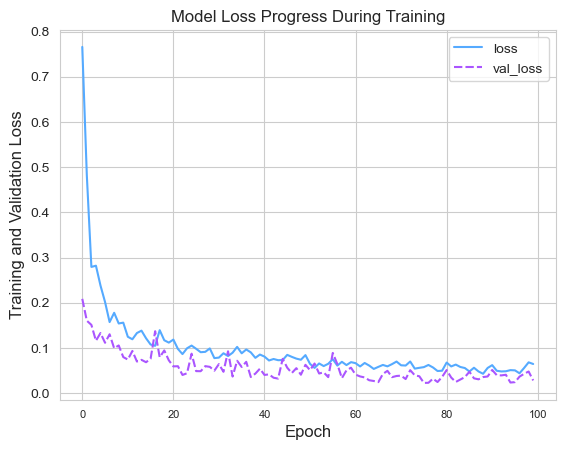

In [190]:
sns.set_style("whitegrid")
sns.lineplot(data=ann_loss[['loss', 'val_loss']], palette="cool")
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch', fontsize=12, loc="center")
plt.ylabel('Training and Validation Loss', fontsize=12, loc="center")
plt.legend()
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()

In [191]:
Y_predict = ANN_model.predict(X_test)

predictions_df = pd.DataFrame(np.ravel(Y_predict),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(Y_test,columns=["Actual Values"]), predictions_df],axis=1)
comparison_df 



5/5 [==============================] - 0s 2ms/step


,Actual Values,Predictions
0,1.049980,1.005728
1,-0.524746,-0.413219
2,0.967099,1.025481
3,-0.905995,-0.616503
4,-0.375561,-0.442586
...,...,...
131,-0.640778,-0.680647
132,-0.557898,-0.371399
133,1.000251,0.968024
134,-1.850830,-1.629289


In [192]:
Y_test_orig = transform.inverse_transform(Y_test)
Y_predict_orig = transform.inverse_transform(Y_predict)

In [193]:
predictions_orig_df = pd.DataFrame(np.ravel(Y_predict_orig),columns=["Predictions"])
comparison_orig_df = pd.concat([pd.DataFrame(Y_test_orig,columns=["Actual Values"]), predictions_orig_df],axis=1)
comparison_orig_df 

,Actual Values,Predictions
0,357.0,354.330414
1,262.0,268.728210
2,352.0,355.522064
3,239.0,256.464478
4,271.0,266.956512
...,...,...
131,255.0,252.594757
132,260.0,271.251099
133,354.0,352.055756
134,182.0,195.365112


Text(0, 0.5, 'Actual Values')

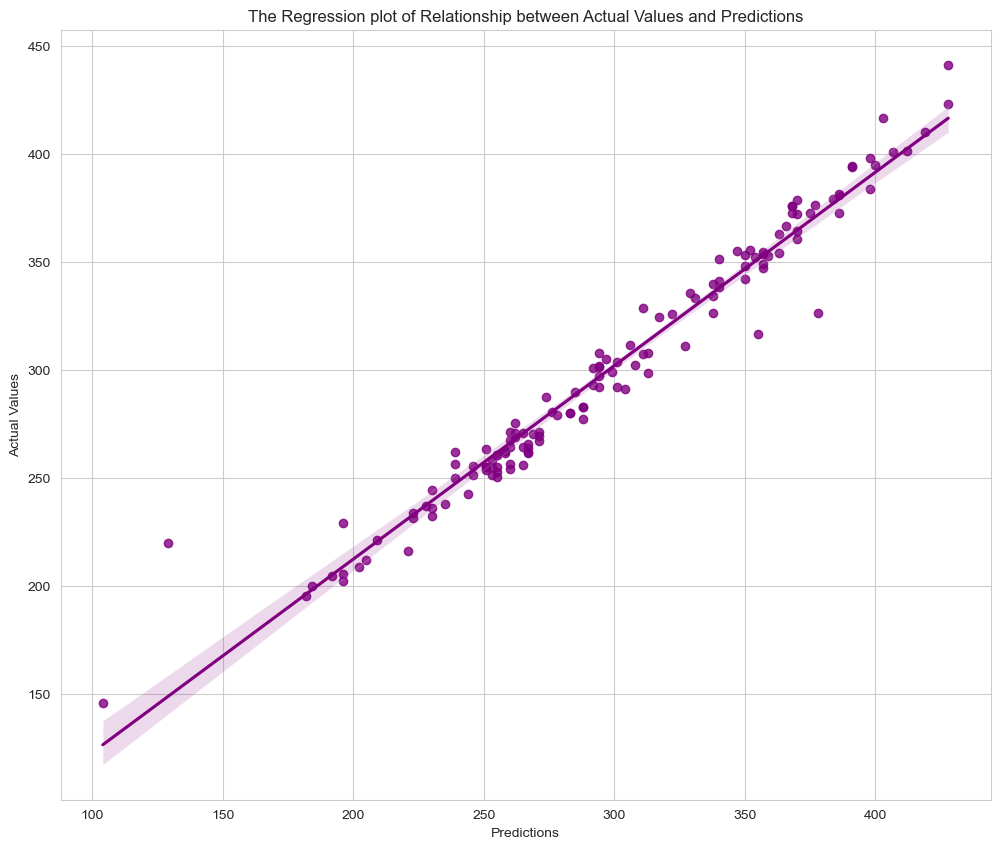

In [216]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,10))
sns.regplot(data=comparison_orig_df, x=comparison_orig_df["Actual Values"], y=comparison_orig_df["Predictions"], color="purple")
plt.title("The Regression plot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")


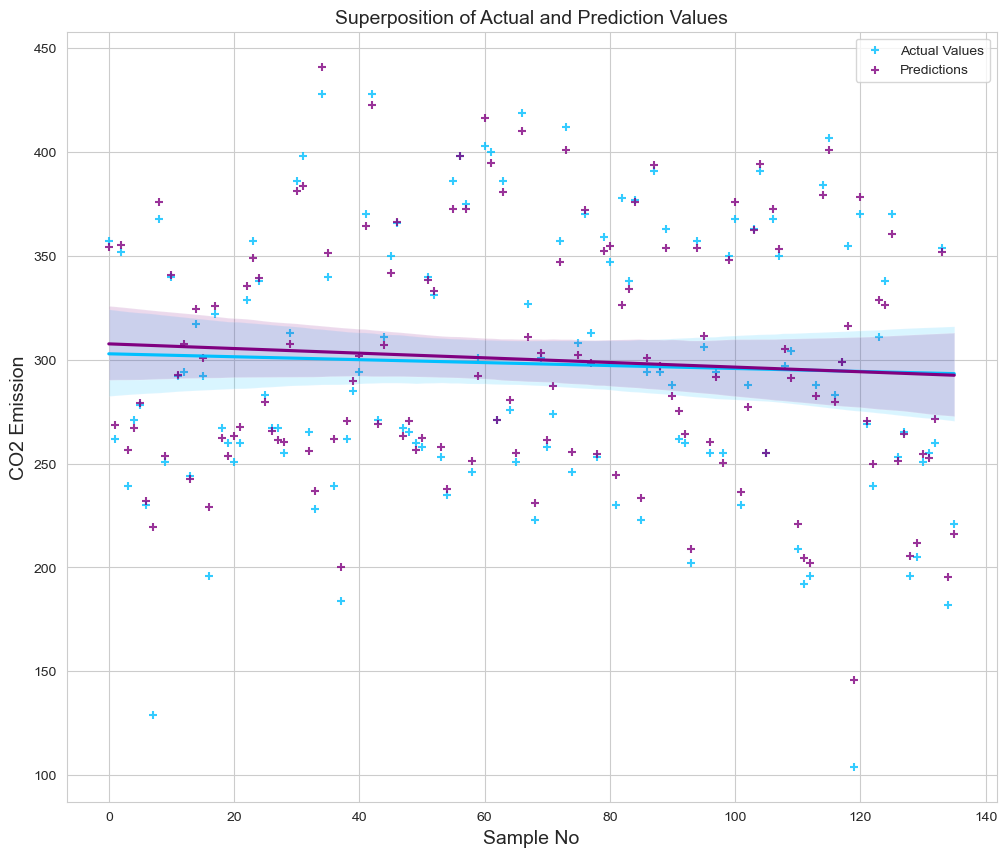

In [195]:
fig = plt.figure(figsize=(12, 10))
sns.regplot(x=pd.DataFrame([range(0,136)]), y=comparison_orig_df["Actual Values"], color='deepskyblue', marker='+', label="Actual Values")
sns.regplot(x=pd.DataFrame([range(0,136)]), y=comparison_orig_df["Predictions"], color="purple", marker='+', label="Predictions")

plt.title('Superposition of Actual and Prediction Values', size=14)
plt.xlabel('Sample No', size=14)
plt.ylabel('CO2 Emission', size=14)
plt.legend()
plt.show()

C:\Users\ARCHITECTURE\AppData\Local\Temp\ipykernel_18448\3823322.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comparison_orig_df["Actual Values"], color="deepskyblue", label="Actual Values", ax=ax, bins=10)
C:\Users\ARCHITECTURE\AppData\Local\Temp\ipykernel_18448\3823322.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

<Figure size 2400x2200 with 0 Axes>

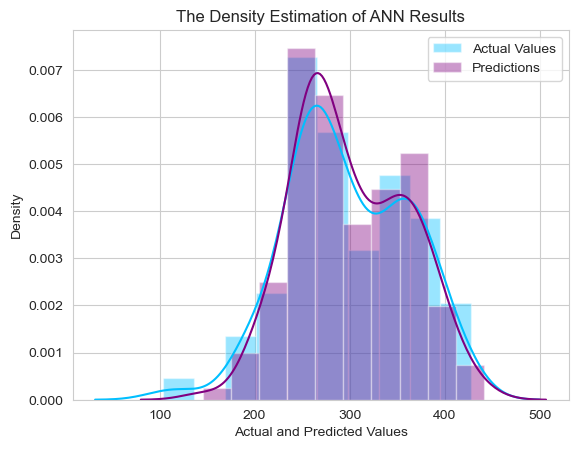

In [221]:
sns.set_style("whitegrid")


plt.figure(figsize=(24,22))
fig, ax = plt.subplots()
sns.distplot(comparison_orig_df["Actual Values"], color="deepskyblue", label="Actual Values", ax=ax, bins=10)
sns.distplot(comparison_orig_df["Predictions"], color="purple", label="Predictions", ax=ax, bins=10)

plt.title("The Density Estimation of ANN Results")
plt.xlabel("Actual and Predicted Values")
plt.ylabel("Density")
plt.legend()
plt.show()

In [197]:
MSE = mean_squared_error(Y_test_orig, Y_predict_orig)
MAE = mean_absolute_error(Y_test_orig, Y_predict_orig)
r2 = r2_score(Y_test_orig, Y_predict_orig)

print('MSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

MSE = 170.4546 
MAE = 8.045311 
R2 = 0.9580679403925068
